# Edge Detection 

Convolving an image with gradients for edge detection

In [50]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

We begin the process by defining a function, that as its name suggests, converts an image's gradient by returning the dot product of an image's rgb values (a matrix) with an array.

In [40]:
# Not exactly sure how to describe what the function does to the image 
# since it doesn't actually result in grayscale?

In [29]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

Now, let's see the matrix that comprises the image that we are working with in this lab, and then see the image itself in the cell after.

In [58]:
lenna = plt.imread('Lenna.jpg')
lenna

array([[[223, 134, 118],
        [225, 134, 116],
        [226, 135, 117],
        ...,
        [184, 101, 111],
        [202, 119, 129],
        [221, 138, 148]],

       [[224, 133, 115],
        [225, 134, 116],
        [225, 134, 115],
        ...,
        [197, 115, 129],
        [185, 103, 117],
        [171,  89, 103]],

       [[223, 132, 114],
        [223, 132, 114],
        [224, 133, 114],
        ...,
        [140,  58,  80],
        [119,  37,  59],
        [ 94,  12,  34]],

       ...,

       [[ 86,  35,  68],
        [ 92,  31,  65],
        [105,  34,  66],
        ...,
        [103,  23,  48],
        [116,  33,  59],
        [124,  42,  65]],

       [[ 85,  34,  67],
        [ 90,  29,  63],
        [103,  32,  64],
        ...,
        [120,  37,  63],
        [131,  49,  72],
        [142,  58,  82]],

       [[ 82,  31,  64],
        [ 87,  26,  60],
        [100,  29,  61],
        ...,
        [130,  48,  71],
        [144,  60,  84],
        [157,  72,  95]]

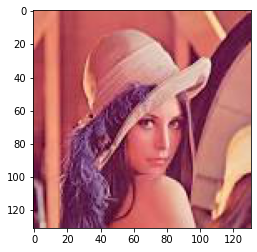

In [39]:
plt.imshow(lenna)

Its also worth noting the shape of the Lenna file.

In [59]:
lenna.shape

(131, 131, 3)

Right now, it is (131, 131, 3). This means that it is a nested matrix with 131 separate matrices within the file, and each of those matrices are 131 by 3 in shape (131 rows, 3 columns).

For the rest of this lab, we'll be working with the lenna.jpg file passed into the function we defined earlier.

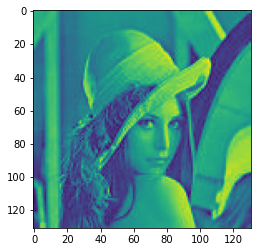

In [60]:
lenna = rgb2gray(lenna)
plt.imshow(lenna)

You should notice that the shape after the function's dot product operation is now (131, 131).

In [63]:
lenna.shape

(131, 131)

The following lines of code is creating matrices of different rgb values to convolve the lenna image with. If you want to see what Gx and Gy look like in terms of their rgb values, uncomment the cell after this one and run it.

In [68]:
Gx = np.zeros ((3, 3))
Gy = np.zeros((3, 3))
Gx = [[1,  2, 1], [0,  0,  0], [-1, -2, -1]]
Gy = [[1,  0,  -1],  [2, 0, -2],  [1, 0, -1]]

In [72]:
# plt.subplot(2, 2, 1)
# plt.imshow(Gx)
# plt.show()

In [73]:
# plt.subplot(2, 2, 1)
# plt.imshow(Gy)
# plt.show()

Now, let's convolve Lenna with Gy and Gx, and then find the gradient between the new convolved lennaY and lennaX. Finding this gradient is key to the notion of edge detection, which will be more obvious soon.

In [84]:
lennaY = signal.convolve2d (lenna, Gy)
lennaX = signal.convolve2d (lenna, Gx)

In [85]:
gradient = np.sqrt(np.square(lennaX) + np.square(lennaY))
gradient *= 255.0 / gradient.max()

Let's take a look at the color scheme that we've convolved with Lenna.

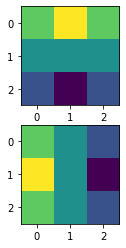

In [86]:
plt.figure(1) # identifier for this specific plot
plt.subplot(2, 1, 1)
plt.imshow (Gx)
plt.subplot(2, 1, 2)
plt.imshow (Gy)

And now, let's take a look at the original lenna file again, and then the lennaX and lennaY we computed using scipy's signal package.

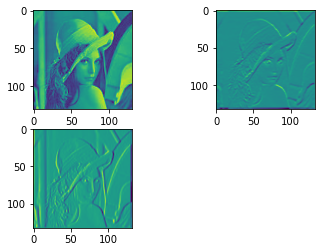

In [88]:
plt.figure(2)
plt.subplot(2, 2, 1)
plt.imshow (lenna)
plt.subplot(2, 2, 2)
plt.imshow (lennaX)
plt.subplot(2, 2, 3)
plt.imshow (lennaY)

And finally, we can use the gradient that we computed between lennaX and lennaY to detect and visually represent the edges of the original lenna file.

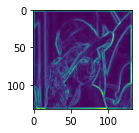

In [90]:
plt.subplot(2, 2, 4)
plt.imshow (gradient)
plt.show()

_

Below is the main() setup for the functions.

In [10]:
def main():
    lenna = plt.imread('Lenna.jpg')
    lenna = rgb2gray(lenna)

    print (lenna.shape)
    
    Gx = np.zeros ((3, 3))
    Gy = np.zeros ((3, 3))    
    Gx =  [[1,  2, 1], [0,  0,  0], [-1, -2, -1]]
    Gy = [[1,  0,  -1],  [2, 0, -2],  [1, 0, -1]]

    lennaY = signal.convolve2d (lenna, Gy)
    lennaX = signal.convolve2d (lenna, Gx)

    gradient = np.sqrt(np.square(lennaX) + np.square(lennaY))
    gradient *= 255.0 / gradient.max()
 
    plt.figure(1) # identifier for this plot
    plt.subplot(2, 1, 1)
    plt.imshow (Gx)
    plt.subplot(2, 1, 2)
    plt.imshow (Gy)


    plt.figure(2)
    plt.subplot(2, 2, 1)
    plt.imshow (lenna)
    plt.subplot(2, 2, 2)
    plt.imshow (lennaX)
    plt.subplot(2, 2, 3)
    plt.imshow (lennaY)
    plt.subplot(2, 2, 4)
    plt.imshow (gradient)
    plt.show()

In [ ]:
# main call
main()

In [94]:
# I tried to use widgets somehow, but probably no good way to implement
# it for this lab? I also couldn't figure it out..

In [95]:
#import ipywidgets as widgets

In [96]:
# # from IPython.display import display
# from ipywidgets import interact
# !jupyter nbextension enable --py widgetsnbextension
# w = widgets.IntSlider()
# display(w)